Project seedling recognization

In [119]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential          
from tensorflow.keras.layers import Conv2D             
from tensorflow.keras.layers import MaxPooling2D        
from tensorflow.keras.layers import Flatten             
from tensorflow.keras.layers import Dense, Dropout 
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
tf.__version__

'2.4.1'

Please upload the images.npy and Labels.cvs file to the root directory of the Google Colabs. 

In [ ]:
# data_array = np.load('/content/drive/MyDrive/Colab Notebooks/data/myimages.npy')
# labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/mylabels.csv')

In [120]:
data_array = np.load('/content/images.npy')
labels = pd.read_csv('/content/Labels.csv')

In [121]:
print(data_array.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


Normalization and performing Gaussian Blurring

In [122]:
kernel = np.ones((5,5),np.float32)/25
normalised_data = []
for i in range(0,data_array.shape[0]):
  normalised_data.append(cv2.filter2D(data_array[i] / 255.0,-1,kernel))

Visualizing the first 5 images after Normalization and Gaussian Blurring

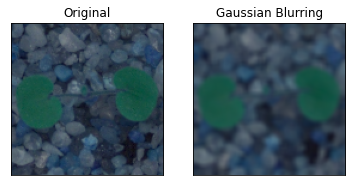

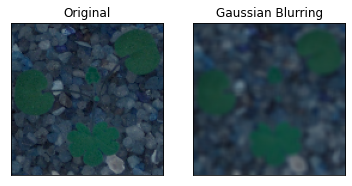

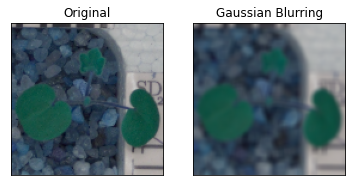

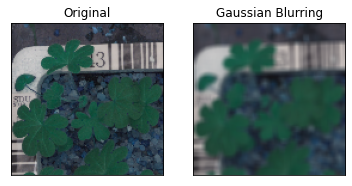

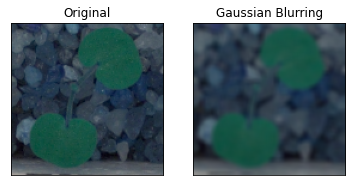

In [123]:
for i in range(0,5):
  img = data_array[i]
  dst = normalised_data[i]

  plt.subplot(121),plt.imshow(img),plt.title('Original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(dst),plt.title('Gaussian Blurring')
  plt.xticks([]), plt.yticks([])
  plt.show()

Splitting the data into 70% ttrain data and 30% test data

In [124]:
X_train, X_test, y_train, y_test = train_test_split(normalised_data, labels, test_size=0.30, random_state=17)

In [125]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

3325 3325
1425 1425


Performing Label encoding and one hot encoding on the train and test data

In [126]:
train_label_encoder = LabelEncoder()
train_integer_encoded = train_label_encoder.fit_transform(y_train['Label'])

train_onehot_encoder = OneHotEncoder(sparse=False)
train_integer_encoded = train_integer_encoded.reshape(len(train_integer_encoded), 1)
train_onehot_encoded = train_onehot_encoder.fit_transform(train_integer_encoded)
print(train_onehot_encoded.shape)

(3325, 12)


Retriving the lable for y_train[0]

In [127]:
inverted = train_label_encoder.inverse_transform(train_integer_encoded[0])
inverted[0]

'Charlock'

In [128]:
test_label_encoder = LabelEncoder()
test_integer_encoded = test_label_encoder.fit_transform(y_test['Label'])

test_onehot_encoder = OneHotEncoder(sparse=False)
test_integer_encoded = test_integer_encoded.reshape(len(test_integer_encoded), 1)
test_onehot_encoded = test_onehot_encoder.fit_transform(test_integer_encoded)
print(test_onehot_encoded.shape)

(1425, 12)


Printing the shape of the train data before it can be used for traing the classifier

In [129]:
print(X_train[0].shape)

(128, 128, 3)


In [130]:
print(np.array(X_train).shape)

(3325, 128, 128, 3)


In [131]:
input_shape = np.array(X_train).shape
input_shape[1:]

(128, 128, 3)

The shape of the data is not compatible with the input shape required for training purposes. The data will have to be converted to an array before it can be used for training purposes. 

In [132]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = input_shape[1:], activation = 'relu', padding = 'same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 12, activation = 'softmax'))

In [133]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Splitting the training data further in 50% training set and 50% validation set. 

In [134]:
classifier.fit(np.asarray(X_train), train_onehot_encoded, validation_split=0.5, epochs=20, batch_size=32)

Epoch 1/20
52/52 [==============================] - 1s 20ms/step - loss: 2.4686 - accuracy: 0.1533 - val_loss: 1.8956 - val_accuracy: 0.3812
Epoch 2/20
52/52 [==============================] - 1s 13ms/step - loss: 1.7966 - accuracy: 0.3995 - val_loss: 1.5386 - val_accuracy: 0.4841
Epoch 3/20
52/52 [==============================] - 1s 13ms/step - loss: 1.3877 - accuracy: 0.5066 - val_loss: 1.2479 - val_accuracy: 0.5923
Epoch 4/20
52/52 [==============================] - 1s 13ms/step - loss: 1.1282 - accuracy: 0.6282 - val_loss: 1.1503 - val_accuracy: 0.6097
Epoch 5/20
52/52 [==============================] - 1s 13ms/step - loss: 1.0235 - accuracy: 0.6296 - val_loss: 1.1146 - val_accuracy: 0.6224
Epoch 6/20
52/52 [==============================] - 1s 13ms/step - loss: 0.8982 - accuracy: 0.6707 - val_loss: 1.0491 - val_accuracy: 0.6302
Epoch 7/20
52/52 [==============================] - 1s 13ms/step - loss: 0.7442 - accuracy: 0.7391 - val_loss: 0.9673 - val_accuracy: 0.6693
Epoch 8/20
52

In [135]:
y_pred_temp = classifier.predict(np.asarray(X_test))

In [136]:
classifier.evaluate(np.asarray(X_test), test_onehot_encoded)

45/45 [==============================] - 0s 5ms/step - loss: 1.3567 - accuracy: 0.6772


[1.3566720485687256, 0.6771929860115051]

In order for us to calculate the accuracy of the classifier, we will have to first invert the labels

In [137]:
labels_pred = []
for i in range(len(y_pred_temp)):
  inverted = test_label_encoder.inverse_transform([argmax(y_pred_temp[i, :])])
  labels_pred.append(inverted[0])

y_pred = pd.DataFrame(labels_pred, columns=['Label'])
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.68



Calculating the Confusion Matrix

In [138]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 29   0   0   0   6   0  34   0   0   0   0   2]
 [  0 103   4   0   1   4   0   0   0   6   0   1]
 [  0   2  56   0   1   8   0   0   2   1   1   1]
 [  0   0   0 125   1  18   0   5  16  14   6   1]
 [ 11   0   0   0  30   4  14   0   4   0   0   0]
 [ 12   0   5   2   9  97  19   0   7   0   2   3]
 [ 44   0   0   0   7   4 127   0   5   0   0   1]
 [  1   0   0   4   0   6   1  41   8   0   0   2]
 [  3   5  10   2   3   5   3   2 129   8   0   6]
 [  0   2   1   3   0   6   0   1  20  33   5   1]
 [  0   4   1   1   0   7   1   0   1   6 128   3]
 [  1   1   5   1   2  15   0   0  12   2   1  67]]


Visualizing the predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

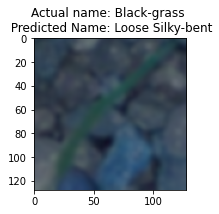

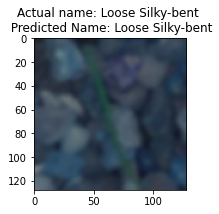

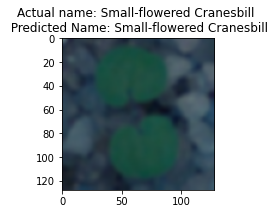

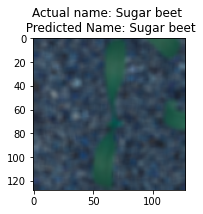

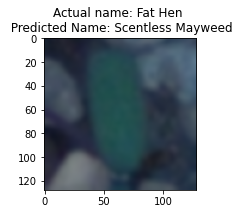

In [139]:
for idx in [2,3,33,36,59]:
  img = X_test[idx]
  actual_name = y_test.iloc[idx]
  predeicted_name = y_pred.iloc[idx]
  plt.subplot(121),plt.imshow(img),plt.title('Actual name: %s \n Predicted Name: %s' % (actual_name['Label'], predeicted_name['Label']))
  plt.show()

In [111]:
# import math
# import numpy as np
# import pandas as pd
# from glob import glob
# from zipfile import ZipFile
# import cv2

In [112]:
# !mkdir train
# !mkdir test

In [113]:
# with ZipFile('/content/drive/MyDrive/Colab Notebooks/data/plant_seedlings/test.zip', 'r') as zip:
#   zip.extractall('./test')

In [114]:
# with ZipFile('/content/drive/MyDrive/Colab Notebooks/data/plant_seedlings/train.zip', 'r') as zip:
#   zip.extractall('./train')

In [115]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2,horizontal_flip = True)

In [116]:
# test_datagen = ImageDataGenerator(rescale = 1./255)

In [117]:
# training_set = train_datagen.flow_from_directory('/content/train', target_size = (128, 128, 3), batch_size = 32, class_mode = 'categorical')

Found 4750 images belonging to 12 classes.


In [118]:
# test_set = test_datagen.flow_from_directory('/content/test', target_size = (128, 128, 3), batch_size = 32,  class_mode = 'categorical')

Found 0 images belonging to 0 classes.
